In [1]:
%pip uninstall -y fsspec
%pip uninstall torch torchvision torchaudio -y

Found existing installation: fsspec 2024.12.0
Uninstalling fsspec-2024.12.0:
  Successfully uninstalled fsspec-2024.12.0
Note: you may need to restart the kernel to use updated packages.
Found existing installation: torch 2.5.1+cu121
Uninstalling torch-2.5.1+cu121:
  Successfully uninstalled torch-2.5.1+cu121
Found existing installation: torchvision 0.20.1+cu121
Uninstalling torchvision-0.20.1+cu121:
  Successfully uninstalled torchvision-0.20.1+cu121
Found existing installation: torchaudio 2.5.1+cu121
Uninstalling torchaudio-2.5.1+cu121:
  Successfully uninstalled torchaudio-2.5.1+cu121
Note: you may need to restart the kernel to use updated packages.


Step 1: Installing dependencies

In [ ]:
%pip install fsspec==2024.12.0
%pip install datasets==3.5.0
%pip install gcsfs==2025.3.2 --no-deps
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
%pip install -q albumentations opencv-python matplotlib tqdm pytorch-lightning

  Using cached fsspec-2024.12.0-py3-none-any.whl.metadata (11 kB)
Using cached fsspec-2024.12.0-py3-none-any.whl (183 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires google-auth>=1.2, which is not installed.
gcsfs 2025.3.2 requires google-auth-oauthlib, which is not installed.
gcsfs 2025.3.2 requires google-cloud-storage, which is not installed.
pytorch-lightning 2.5.1 requires torch>=2.1.0, which is not installed.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\david\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\david\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\david\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Looking in indexes: https://download.pytorch.org/whl/cu121
  Using cached https://download.pytorch.org/whl/cu121/torch-2.5.1%2Bcu121-cp311-cp311-win_amd64.whl (2449.4 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchvision-0.20.1%2Bcu121-cp311-cp311-win_amd64.whl (6.1 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchaudio-2.5.1%2Bcu121-cp311-cp311-win_amd64.whl (4.1 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\david\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\david\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Step 2: Loading, saving, and visualizing images and masks from the dataset


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


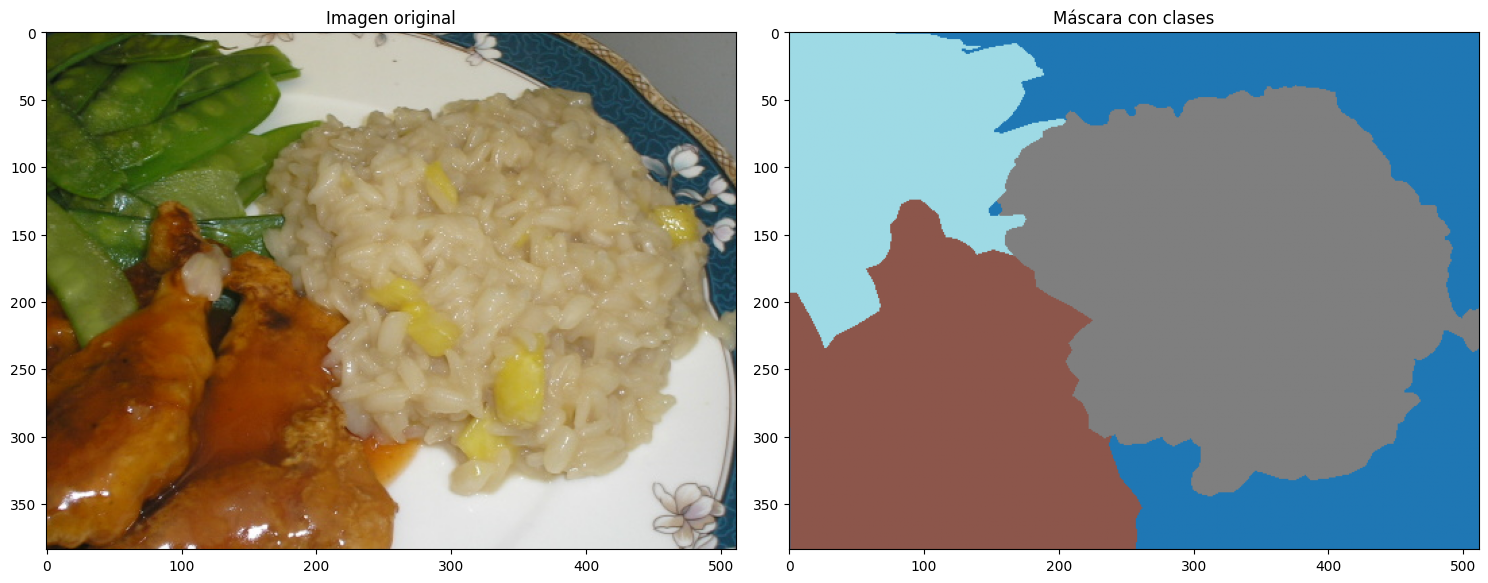

In [ ]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

dataset = load_dataset("EduardoPacheco/FoodSeg103")

id2label = [
    "background", "candy", "egg tart", "french fries", "chocolate", "biscuit", "popcorn", "pudding", "ice cream",
    "cheese butter", "cake", "wine", "milkshake", "coffee", "juice", "milk", "tea", "almond", "red beans", "cashew",
    "dried cranberries", "soy", "walnut", "peanut", "egg", "apple", "date", "apricot", "avocado", "banana",
    "strawberry", "cherry", "blueberry", "raspberry", "mango", "olives", "peach", "lemon", "pear", "fig",
    "pineapple", "grape", "kiwi", "melon", "orange", "watermelon", "steak", "pork", "chicken duck", "sausage",
    "fried meat", "lamb", "sauce", "crab", "fish", "shellfish", "shrimp", "soup", "bread", "corn", "hamburg",
    "pizza", "hanamaki baozi", "wonton dumplings", "pasta", "noodles", "rice", "pie", "tofu", "eggplant", "potato",
    "garlic", "cauliflower", "tomato", "kelp", "seaweed", "spring onion", "rape", "ginger", "okra", "lettuce",
    "pumpkin", "cucumber", "white radish", "carrot", "asparagus", "bamboo shoots", "broccoli", "celery stick",
    "cilantro mint", "snow peas", "cabbage", "bean sprouts", "onion", "pepper", "green beans", "French beans",
    "king oyster mushroom", "shiitake", "enoki mushroom", "oyster mushroom", "white button mushroom", "salad",
    "other ingredients"
]

os.makedirs('images', exist_ok=True)
os.makedirs('masks', exist_ok=True)

guardar_imagenes = input("Guardar imagenes: ")

if guardar_imagenes.lower() == "si":
    for i, sample in enumerate(dataset["train"]):
        sample["image"].save(f'images/image_{i}.png')
        sample["label"].save(f'masks/mask_{i}.png')

image = Image.open('images/image_0.png')
mask = Image.open('masks/mask_0.png')

image_np = np.array(image)
mask_np = np.array(mask)

classes_present = np.unique(mask_np)
labels_present = [id2label[i] for i in classes_present if i < len(id2label)]

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title("Imagen original")

plt.subplot(1, 2, 2)
plt.imshow(mask_np, cmap="tab20")
plt.title("Máscara con clases")
# Crear leyenda
plt.tight_layout()
plt.show()



*Verification that the dataset has been created correctly

In [4]:
import os

print(len(os.listdir("images")))
print("")
print(len(os.listdir("masks")))

4983

4983


Step 3: Generation and visualization of macronutrient masks for the food images

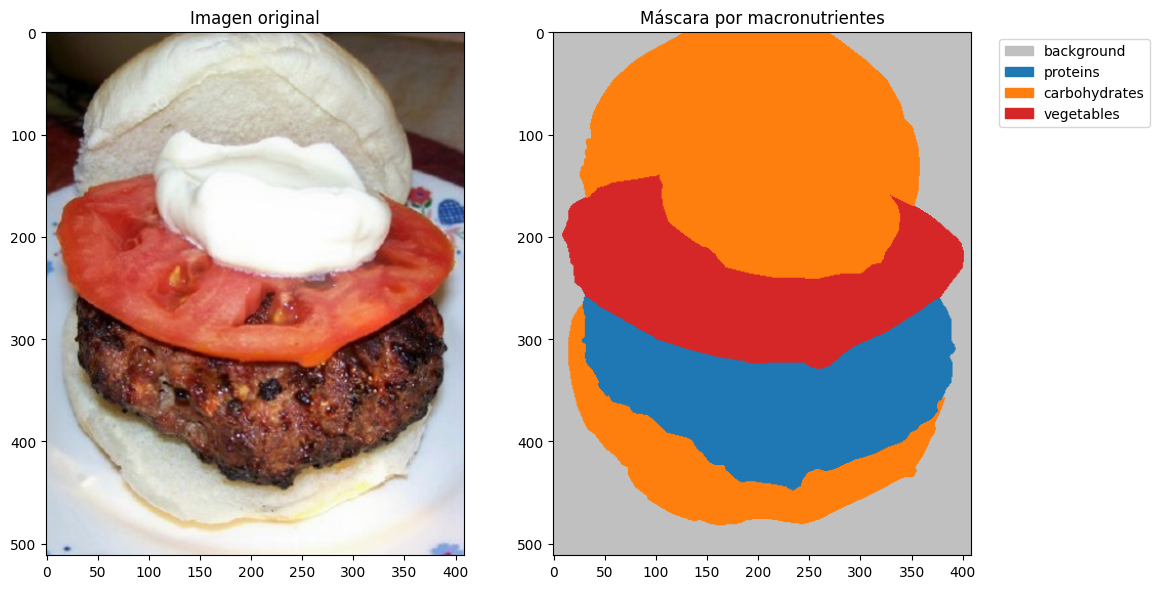

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches

data = {
    "id": list(range(104)),
    "ingredient": [
        "background", "candy", "egg tart", "french fries", "chocolate", "biscuit", "popcorn", "pudding", "ice cream",
        "cheese butter", "cake", "wine", "milkshake", "coffee", "juice", "milk", "tea", "almond", "red beans", "cashew",
        "dried cranberries", "soy", "walnut", "peanut", "egg", "apple", "date", "apricot", "avocado", "banana",
        "strawberry", "cherry", "blueberry", "raspberry", "mango", "olives", "peach", "lemon", "pear", "fig",
        "pineapple", "grape", "kiwi", "melon", "orange", "watermelon", "steak", "pork", "chicken duck", "sausage",
        "fried meat", "lamb", "sauce", "crab", "fish", "shellfish", "shrimp", "soup", "bread", "corn", "hamburg",
        "pizza", "hanamaki baozi", "wonton dumplings", "pasta", "noodles", "rice", "pie", "tofu", "eggplant", "potato",
        "garlic", "cauliflower", "tomato", "kelp", "seaweed", "spring onion", "rape", "ginger", "okra", "lettuce",
        "pumpkin", "cucumber", "white radish", "carrot", "asparagus", "bamboo shoots", "broccoli", "celery stick",
        "cilantro mint", "snow peas", "cabbage", "bean sprouts", "onion", "pepper", "green beans", "French beans",
        "king oyster mushroom", "shiitake", "enoki mushroom", "oyster mushroom", "white button mushroom", "salad",
        "other ingredients"
    ]
}
ingredients_df = pd.DataFrame(data)
ingredients_df.to_csv('ingredients.csv', index=False)

ingredients_df = pd.read_csv('ingredients.csv')
label2id = dict(zip(ingredients_df['ingredient'], ingredients_df['id']))
id2label = dict(zip(ingredients_df['id'], ingredients_df['ingredient']))

macro_map = {
    "background": {"background"},
    "protein": {
        "egg", "steak", "pork", "chicken duck", "sausage", "fried meat", "lamb", "tofu",
        "crab", "fish", "shrimp", "shellfish", "soy", "milk", "king oyster mushroom", "shiitake",
        "enoki mushroom", "oyster mushroom", "white button mushroom"
    },
    "carbohydrate": {
        "bread", "rice", "pasta", "noodles", "cake", "biscuit", "egg tart", "pizza", "popcorn",
        "wonton dumplings", "hanamaki baozi", "pie", "corn", "french fries", "red beans",
        "pudding", "ice cream", "candy",
        "apple", "banana", "strawberry", "cherry", "blueberry", "raspberry", "mango", "peach",
        "lemon", "pear", "fig", "pineapple", "grape", "kiwi", "melon", "orange", "watermelon",
        "date", "apricot", "dried cranberries"
    },
    "fat": {
        "cheese butter", "almond", "cashew", "walnut", "peanut", "chocolate", "avocado", "olives"
    },
    "vegetable": {
        "eggplant", "potato", "garlic", "cauliflower", "tomato", "kelp", "seaweed", "spring onion", "rape", "ginger",
        "okra", "lettuce", "pumpkin", "cucumber", "white radish", "carrot", "asparagus", "bamboo shoots", "broccoli",
        "celery stick", "cilantro mint", "snow peas", "cabbage", "bean sprouts", "onion", "pepper", "green beans",
        "French beans", "salad"
    },
    "other": {
        "coffee", "tea", "wine", "soup", "hamburg", "sauce", "other ingredients", "juice", "milkshake"
    }
}


macro_colors = {
    0: "#c0c0c0",  # background
    1: "#1f77b4",  # protein
    2: "#ff7f0e",  # carbohydrate
    3: "#2ca02c",  # fat
    4: "#d62728",  # vegetable
    5: "#e377c2",  # other
}

macro_names = {
    0: "background",
    1: "proteins",
    2: "carbohydrates",
    3: "fats",
    4: "vegetables",
    5: "other",
}

id2macro = {}
for idx, label in id2label.items():
    macro_class = 0 
    for macro_name, keywords in macro_map.items():
        if label.lower() in [k.lower() for k in keywords]:
            macro_class = list(macro_map.keys()).index(macro_name)
            break
    id2macro[idx] = macro_class

images_dir = 'images'
masks_dir = 'masks'

for i, filename in enumerate(os.listdir(images_dir)):
    image_path = os.path.join(images_dir, filename)
    mask_path = os.path.join(masks_dir, filename.replace('image', 'mask'))

    image = np.array(Image.open(image_path))
    mask = np.array(Image.open(mask_path))

    macro_mask = np.zeros_like(mask)
    for class_id, macro_id in id2macro.items():
        macro_mask[mask == class_id] = macro_id

    if i == 7:  

        macros_present = np.unique(macro_mask)

        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title("Imagen original")

        plt.subplot(1, 2, 2)
        
        rgb_mask = np.zeros((*macro_mask.shape, 3), dtype=np.uint8)
        for macro_id in macros_present:
            color_hex = macro_colors[macro_id]
            color_rgb = tuple(int(color_hex.lstrip("#")[i:i+2], 16) for i in (0, 2, 4))
            rgb_mask[macro_mask == macro_id] = color_rgb

        plt.imshow(rgb_mask)
        plt.title("Máscara por macronutrientes")

        from matplotlib.patches import Patch
        legend_patches = [
            Patch(color=macro_colors[macro_id], label=macro_names[macro_id])
            for macro_id in macros_present
        ]
        plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')

        plt.tight_layout()
        plt.show()
        break


Step 4: Defining the UNet architecture with ResNet50 as the encoder for semantic segmentation

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

class UNetResNet50(nn.Module):
    def __init__(self, in_channels=3, out_classes=6):
        super(UNetResNet50, self).__init__()

        resnet = models.resnet50(weights='IMAGENET1K_V1')

        self.encoder = nn.Sequential(*list(resnet.children())[:-2])  

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(2048, 1024, kernel_size=2, stride=2),  
            nn.ReLU(),
            nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2),   
            nn.ReLU(),
            nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2),    
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2),    
            nn.ReLU(),
            
            nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True),  
            nn.Conv2d(128, out_classes, kernel_size=1)  
        )

    def forward(self, x):
        x = self.encoder(x) 
        x = self.decoder(x) 
        return x

Step 5: Defining the custom dataset for macronutrient segmentation using Albumentations and PyTorch

In [ ]:
from torch.utils.data import Dataset, DataLoader, random_split
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np
import os
from PIL import Image
import torch

class MacronutrientDataset(Dataset):
    def __init__(self, images_dir, masks_dir, id2macro, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.id2macro = id2macro
        self.transform = transform
        self.image_files = sorted(os.listdir(images_dir))
        self.mask_files = sorted(os.listdir(masks_dir))

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.images_dir, self.image_files[idx])
        mask_path = os.path.join(self.masks_dir, self.mask_files[idx])

        img = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path)

        if img.size != mask.size:
            mask = mask.resize(img.size, resample=Image.NEAREST)

        img = np.array(img)
        mask = np.array(mask)

        macro_mask = np.zeros_like(mask)
        for class_id, macro_id in self.id2macro.items():
            macro_mask[mask == class_id] = macro_id

        if self.transform:
            augmented = self.transform(image=img, mask=macro_mask)
            img = augmented['image']
            macro_mask = augmented['mask']

        return img, macro_mask.long()


transform = A.Compose([
    A.Resize(256, 256),
    A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    ToTensorV2()
])


full_dataset = MacronutrientDataset('images', 'masks', id2macro, transform=transform)


train_size = int(0.8 * len(full_dataset))  # 3986
val_size = len(full_dataset) - train_size  # 997
generator = torch.Generator().manual_seed(42) 

train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size], generator=generator)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.6' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


*Checking for Nvidia® CUDA to use GPU resources during training

In [8]:
import torch
print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.version())
print("CUDA disponible:", torch.cuda.is_available())


2.5.1+cu121
12.1
90100
CUDA disponible: True


Step 6: Training the UNet model with ResNet50 for macronutrient segmentation using performance metrics (IoU, F1)

Epoch [1/71] - Loss: 1.0061 - Accuracy: 58.80%
    IoU Scores: [0.6589334738874729, 0.191560054514897, 0.22252661633326534, 0.0, 0.17705397975254608, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    F1 Score: 0.5385
GPU Memory Allocated: 542.49 MB
Epoch [2/71] - Loss: 0.8075 - Accuracy: 70.00%
    IoU Scores: [0.813956328124988, 0.3502966821685748, 0.3313704685166245, 0.0, 0.4188328011076916, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    F1 Score: 0.6831
GPU Memory Allocated: 542.99 M

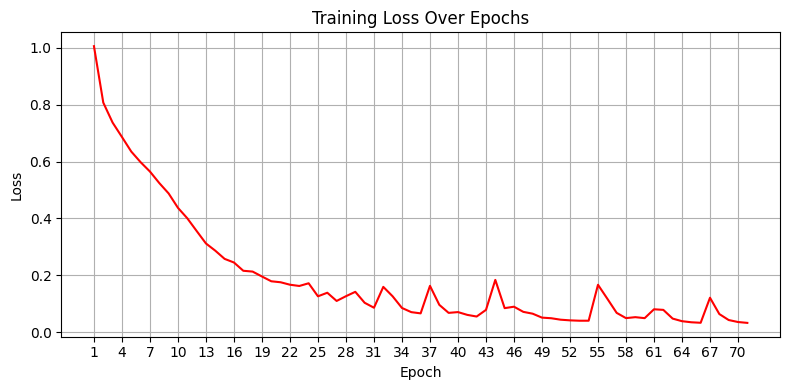

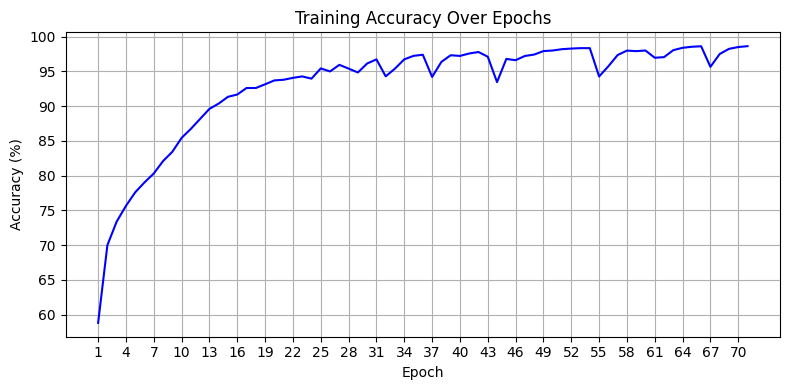

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = UNetResNet50().to(device)


optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

def compute_iou(preds, labels, num_classes):
    iou_list = []
    for class_id in range(num_classes):
        intersection = torch.sum((preds == class_id) & (labels == class_id)).item()
        union = torch.sum((preds == class_id) | (labels == class_id)).item()
        iou = intersection / union if union != 0 else 0
        iou_list.append(iou)
    return iou_list

epochs = 71  

loss_history = []
accuracy_history = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_pixels = 0
    total_pixels = 0
    all_preds = []
    all_labels = []

    for images, masks in train_loader:
        images, masks = images.to(device), masks.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        preds = torch.argmax(outputs, dim=1)
        correct_pixels += torch.sum(preds == masks).item()
        total_pixels += masks.numel()

        all_preds.append(preds.view(-1).cpu().numpy())
        all_labels.append(masks.view(-1).cpu().numpy())

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100.0 * correct_pixels / total_pixels

    loss_history.append(epoch_loss)
    accuracy_history.append(epoch_acc)

    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)

    iou_scores = compute_iou(torch.tensor(all_preds), torch.tensor(all_labels), num_classes=len(id2label))
    f1 = f1_score(all_labels, all_preds, average='weighted')

    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc:.2f}%")
    print(f"    IoU Scores: {iou_scores}")
    print(f"    F1 Score: {f1:.4f}")
    print(f"GPU Memory Allocated: {torch.cuda.memory_allocated() / 1024**2:.2f} MB")

torch.save(model.state_dict(), "unet_resnet50.pth")

plt.figure(figsize=(8, 4))
plt.plot(range(1, epochs + 1), loss_history, label='Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.xticks(range(1, epochs + 1, 3))

plt.tight_layout()
plt.savefig('training_loss.png')
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(range(1, epochs + 1), accuracy_history, label='Accuracy', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy Over Epochs')
plt.grid(True)
plt.xticks(range(1, epochs + 1, 3))
plt.tight_layout()
plt.savefig('training_accuracy.png')
plt.show()

Step 7: Visualization of segmentation predictions and per-class accuracy

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.97647065].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9843138..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with R

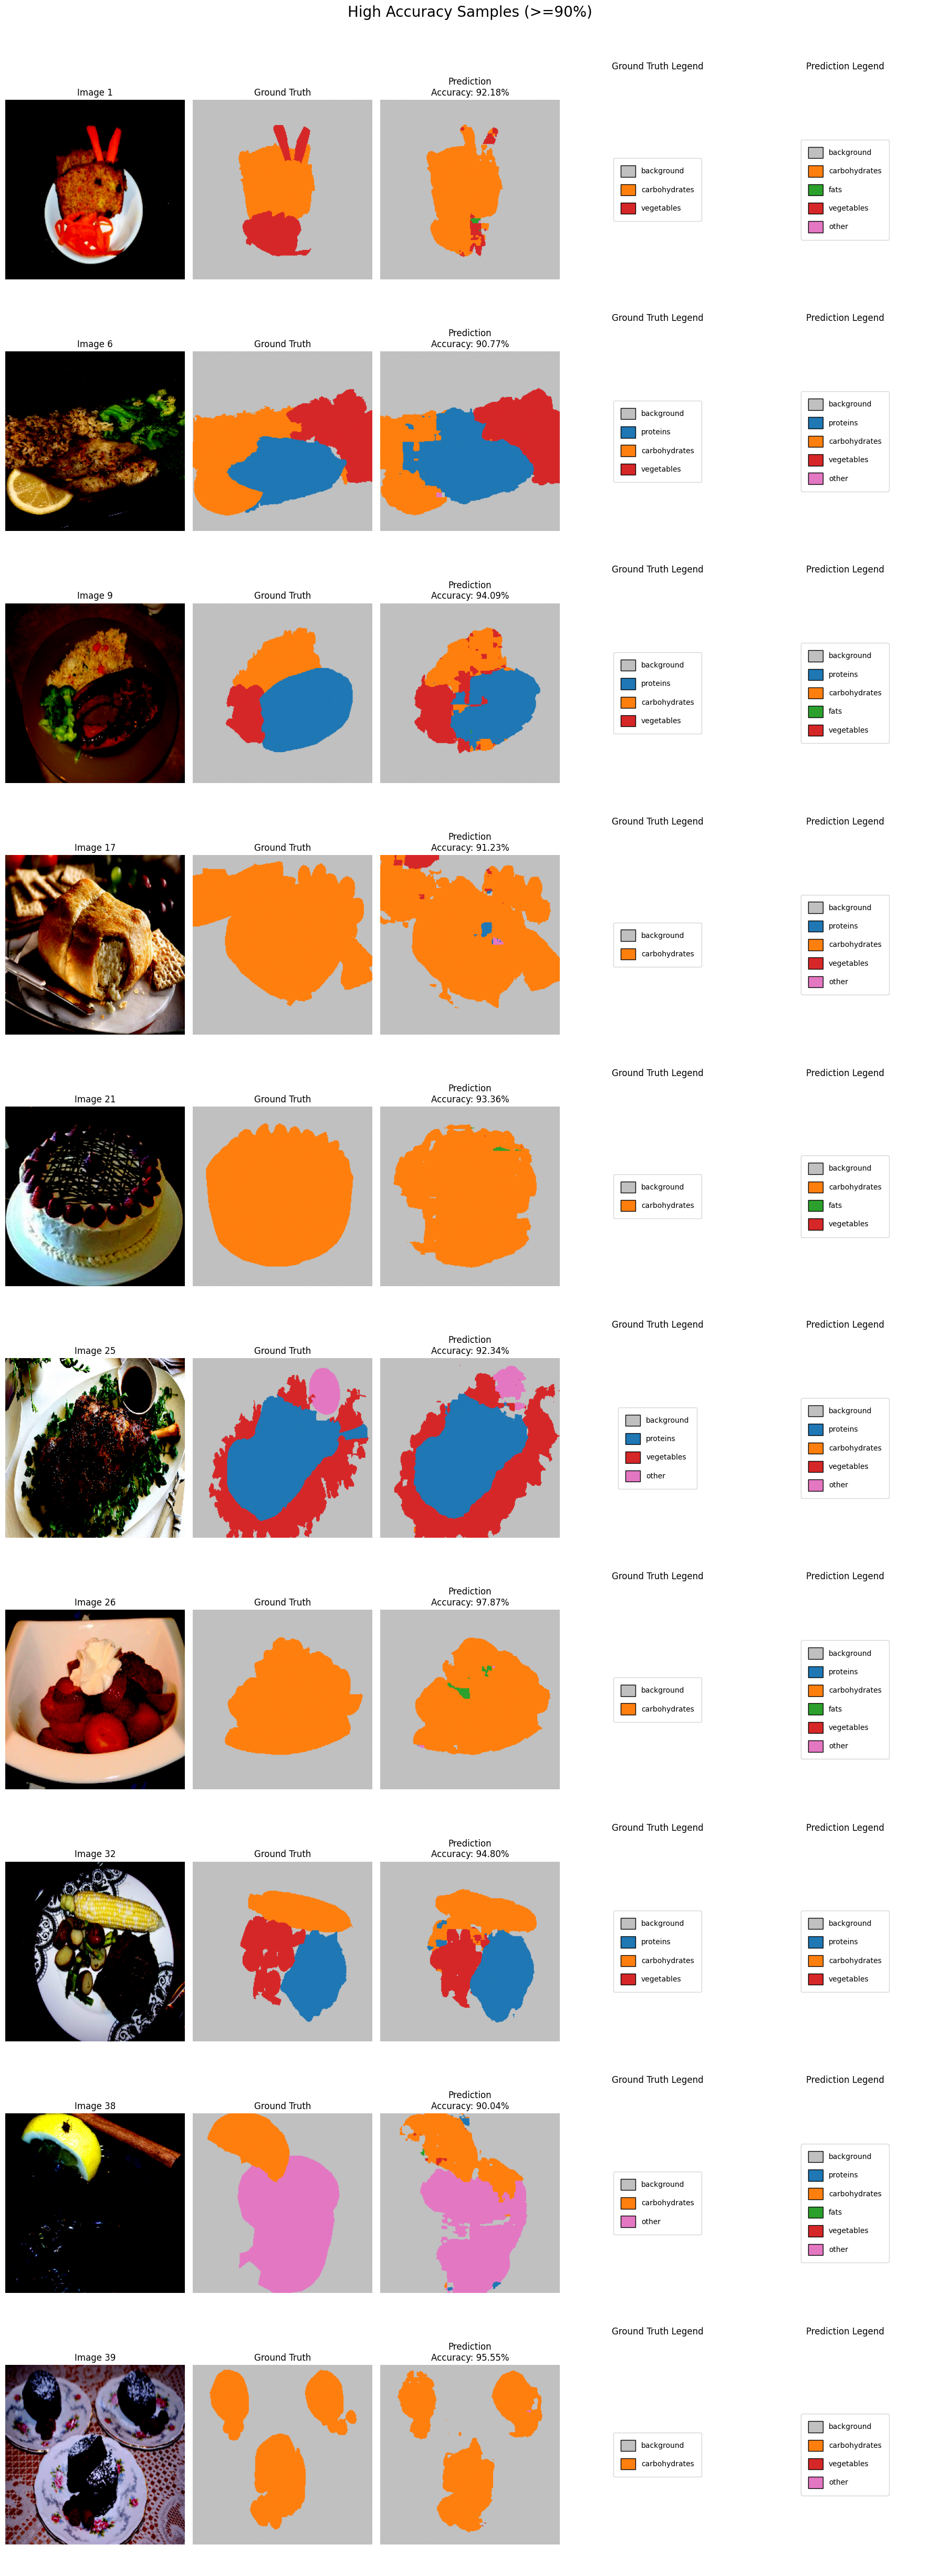

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


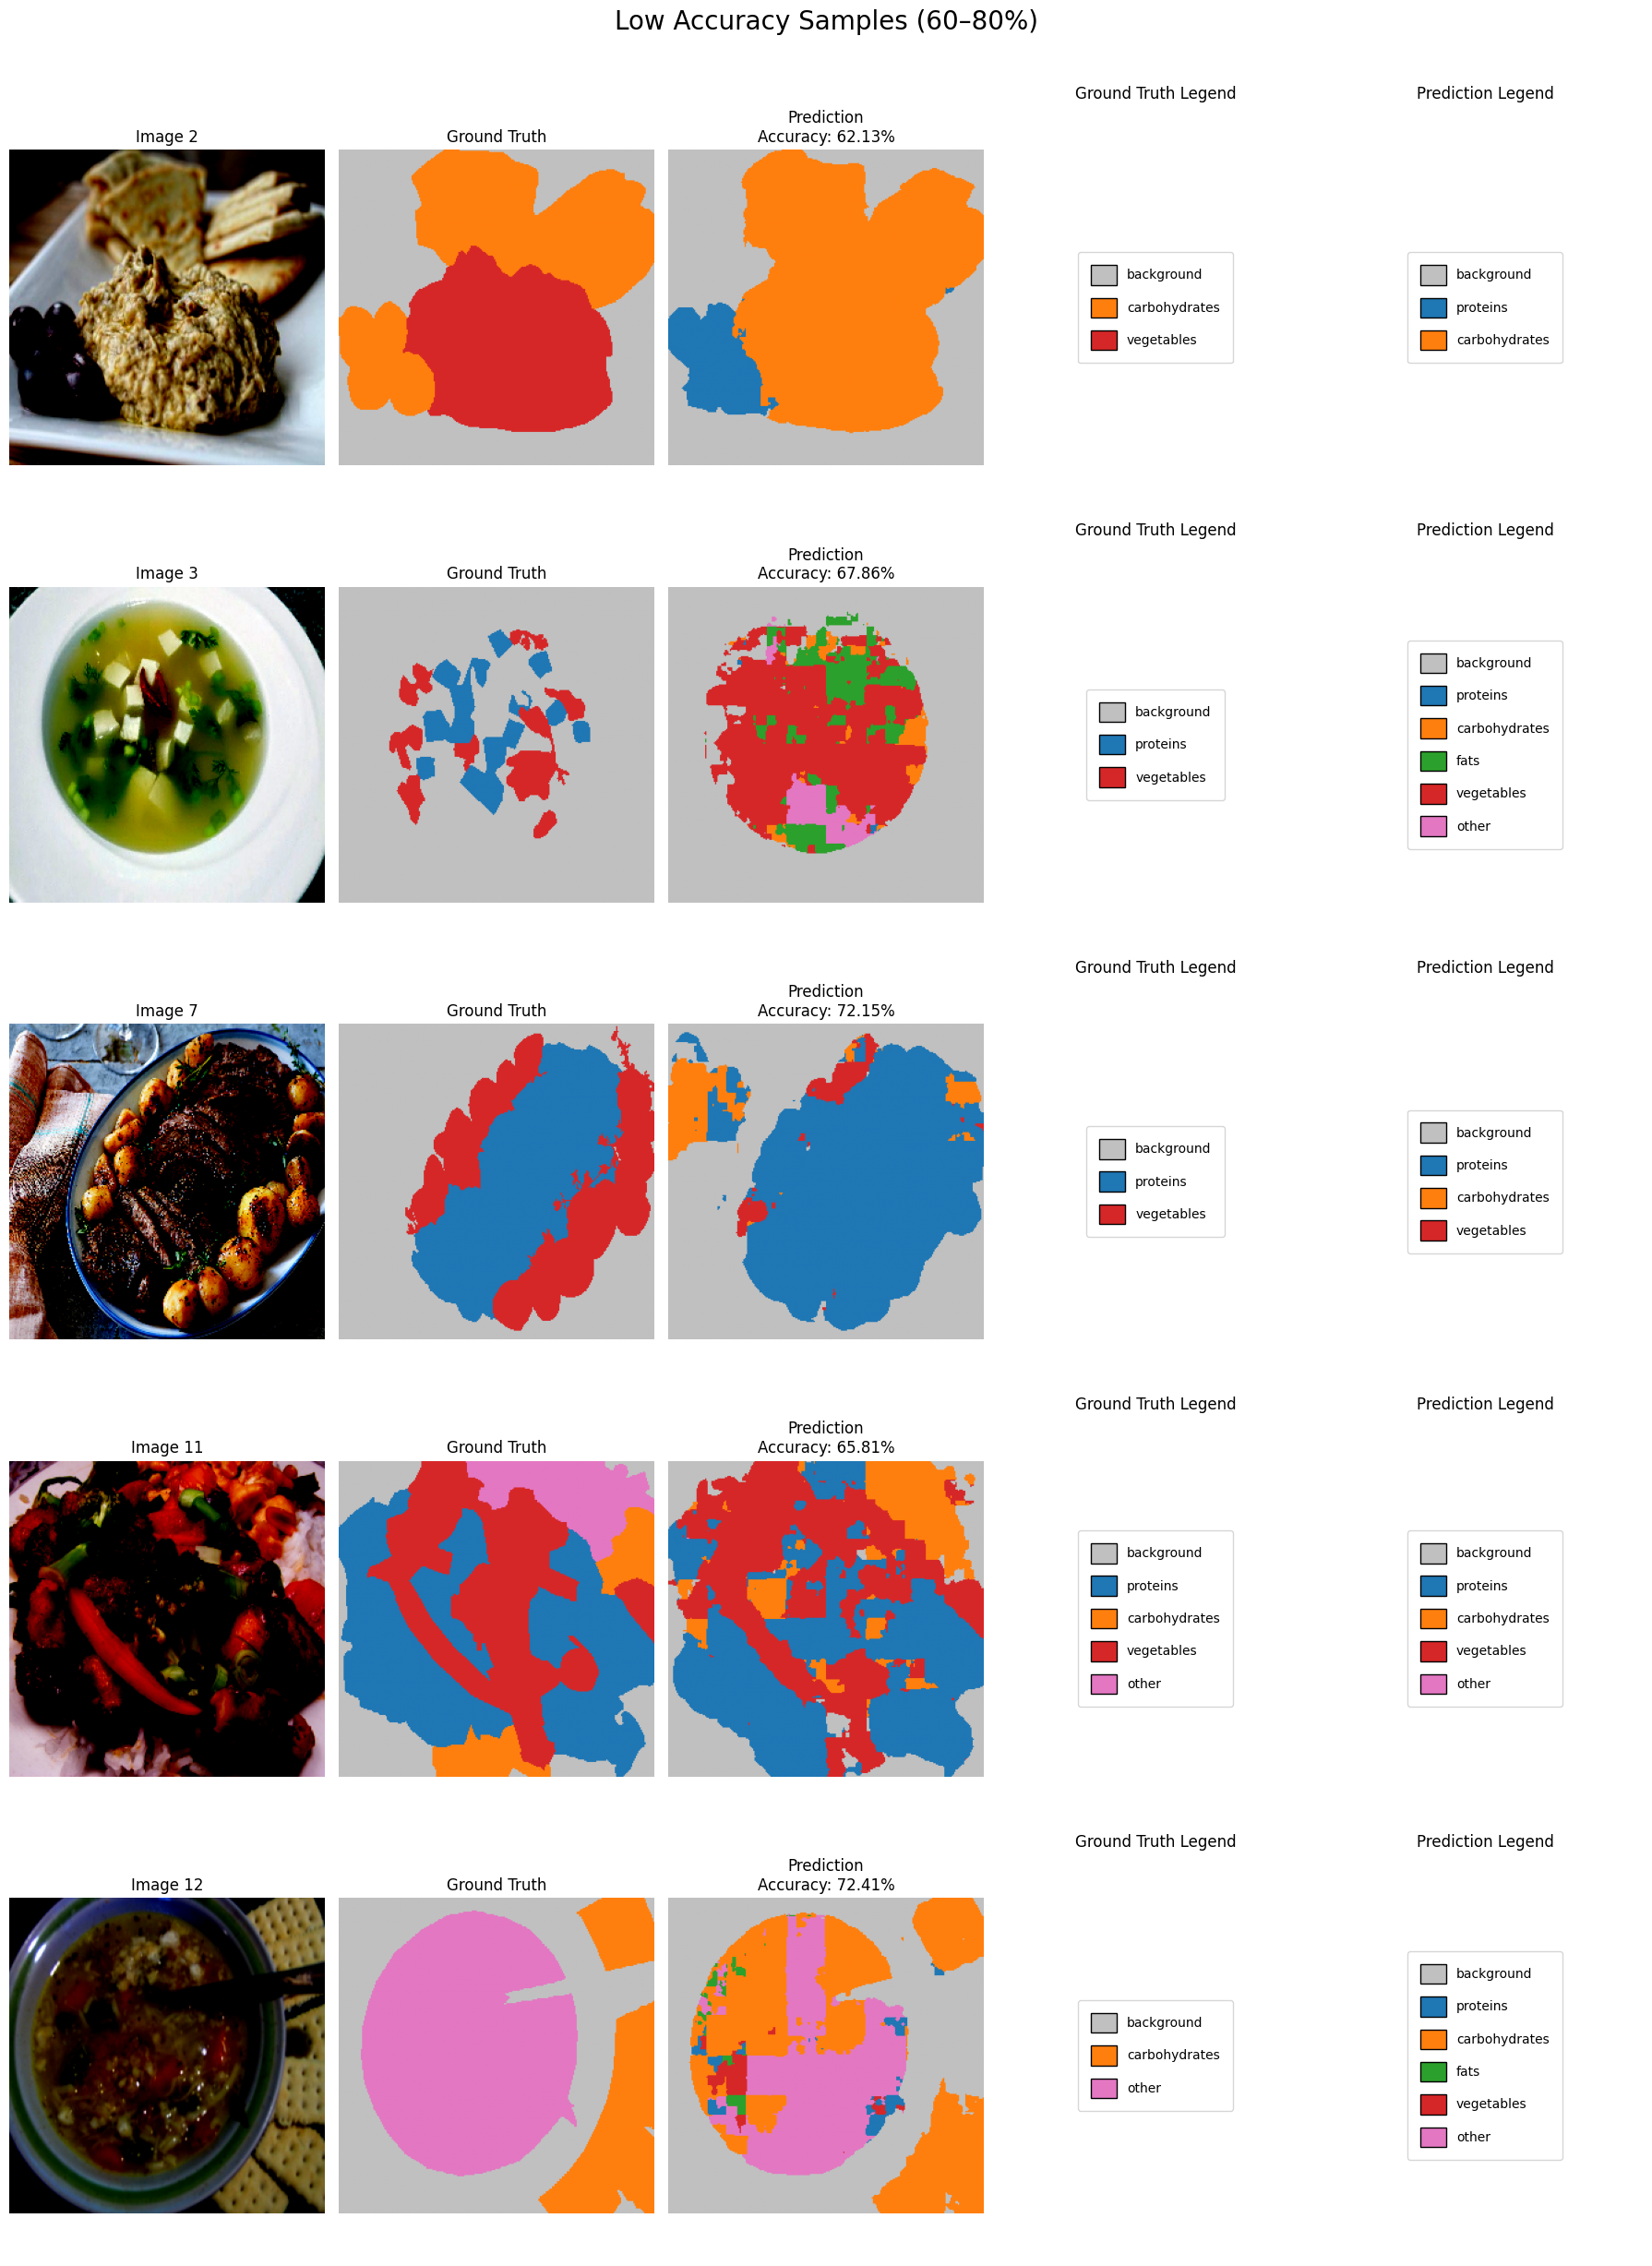

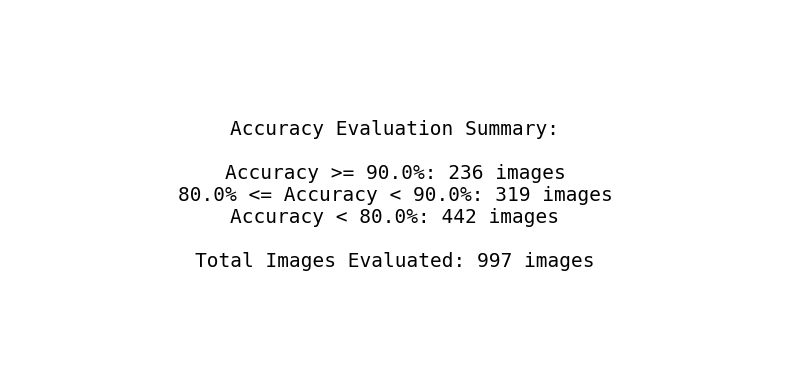

Archivo CSV guardado: accuracy_por_imagen.csv


In [ ]:
import torch 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import csv

accuracy_threshold_top = 90.0
accuracy_threshold_mid = 80.0
accuracy_threshold_low = 60.0

id2label = {
    0: 'background',
    1: 'proteins',
    2: 'carbohydrates',
    3: 'fats',
    4: 'vegetables',
    5: 'other'
}

colors = [
    "#c0c0c0",  # background
    "#1f77b4",  # protein
    "#ff7f0e",  # carbohydrate
    "#2ca02c",  # fat
    "#d62728",  # vegetable
    "#e377c2",  # other
]

cmap = ListedColormap(colors)
norm = BoundaryNorm(range(len(id2label) + 1), cmap.N)

model.eval()
qualified_samples = []       # accuracy >= 90
low_accuracy_samples = []    # 60 <= accuracy < 80

acc_90_or_more = 0
acc_80_to_89 = 0
acc_below_80 = 0

all_image_accuracies = []

with torch.no_grad():
    for idx in range(len(val_dataset)):
        image, true_mask = val_dataset[idx]
        output = model(image.unsqueeze(0).to(device))
        pred_mask = torch.argmax(output, dim=1).squeeze().cpu()

        correct = torch.sum(pred_mask == true_mask).item()
        total = true_mask.numel()
        accuracy = 100.0 * correct / total

        all_image_accuracies.append({
            'index': idx,
            'accuracy': accuracy
        })

        if accuracy >= accuracy_threshold_top:
            acc_90_or_more += 1
            if len(qualified_samples) < 10:
                qualified_samples.append((idx, image, true_mask, pred_mask, accuracy))
        elif accuracy_threshold_mid <= accuracy < accuracy_threshold_top:
            acc_80_to_89 += 1
        else:
            acc_below_80 += 1
            if accuracy_threshold_low <= accuracy < accuracy_threshold_mid and len(low_accuracy_samples) < 5:
                low_accuracy_samples.append((idx, image, true_mask, pred_mask, accuracy))

def visualizar_segmentaciones(samples, filas, titulo_archivo, titulo_general):
    if not samples:
        return

    fig = plt.figure(figsize=(18, 5 * filas))

    for i, (idx, image, true_mask, pred_mask, accuracy) in enumerate(samples):
        plt.subplot(filas, 5, i * 5 + 1)
        plt.imshow(image.permute(1, 2, 0).cpu().numpy())
        plt.title(f"Image {idx}")
        plt.axis('off')

        plt.subplot(filas, 5, i * 5 + 2)
        plt.imshow(true_mask, cmap=cmap, norm=norm)
        plt.title("Ground Truth")
        plt.axis('off')

        plt.subplot(filas, 5, i * 5 + 3)
        plt.imshow(pred_mask, cmap=cmap, norm=norm)
        plt.title(f"Prediction\nAccuracy: {accuracy:.2f}%")
        plt.axis('off')

        unique_true = torch.unique(true_mask).tolist()
        true_patches = [
            mpatches.Patch(facecolor=colors[class_id], edgecolor='black', label=id2label[class_id])
            for class_id in unique_true
        ]
        plt.subplot(filas, 5, i * 5 + 4)
        plt.legend(handles=true_patches, loc='center', fontsize=10, frameon=True,
                   handlelength=2, handleheight=2, borderpad=1, labelspacing=1)
        plt.axis('off')
        plt.title("Ground Truth Legend")

        unique_pred = torch.unique(pred_mask).tolist()
        pred_patches = [
            mpatches.Patch(facecolor=colors[class_id], edgecolor='black', label=id2label[class_id])
            for class_id in unique_pred
        ]
        plt.subplot(filas, 5, i * 5 + 5)
        plt.legend(handles=pred_patches, loc='center', fontsize=10, frameon=True,
                   handlelength=2, handleheight=2, borderpad=1, labelspacing=1)
        plt.axis('off')
        plt.title("Prediction Legend")

    plt.suptitle(titulo_general, fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.97])  
    plt.savefig(titulo_archivo, dpi=300)
    plt.show()

visualizar_segmentaciones(
    qualified_samples,
    filas=10,
    titulo_archivo="segmentacion_resultados.png",
    titulo_general="High Accuracy Samples (>=90%)"
)

visualizar_segmentaciones(
    low_accuracy_samples,
    filas=5,
    titulo_archivo="segmentacion_baja_accuracy.png",
    titulo_general="Low Accuracy Samples (60–80%)"
)

total_images = acc_90_or_more + acc_80_to_89 + acc_below_80

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')

resumen_texto = (
    f"Accuracy Evaluation Summary:\n\n"
    f"Accuracy >= {accuracy_threshold_top:.1f}%: {acc_90_or_more} images\n"
    f"{accuracy_threshold_mid:.1f}% <= Accuracy < {accuracy_threshold_top:.1f}%: {acc_80_to_89} images\n"
    f"Accuracy < {accuracy_threshold_mid:.1f}%: {acc_below_80} images\n\n"
    f"Total Images Evaluated: {total_images} images"
)

plt.text(0.5, 0.5, resumen_texto, ha='center', va='center',
         fontsize=14, wrap=True, family='monospace')

plt.tight_layout()
plt.savefig("resumen_accuracy.png", dpi=300)
plt.show()

csv_filename = "accuracy_por_imagen.csv"
with open(csv_filename, mode='w', newline='') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=['index', 'accuracy'])
    writer.writeheader()
    writer.writerows(all_image_accuracies)

print(f"Archivo CSV guardado: {csv_filename}")




Step 8: Saving the created model (this step is unnecessary, as the model is already saved at the end of Step 6)

In [ ]:
torch.save(model.state_dict(), "unet_resnet50.pth")